<a href="https://colab.research.google.com/github/hursoo/big_k-modern_1/blob/main/gb_071_so_context_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.개요
- 13-14강. 필자 그룹별 So 문맥 비교

In [ ]:
# 구글 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 경로 지정

file_path = '/content/drive/MyDrive/_big1_25-1_code/'

In [ ]:
## 런타임 다시 시작 후엔 이 셀 건너뛸 것 !

# =================================================================
# 1단계: 나눔 폰트 설치 (이 셀을 실행한 후, 런타임을 다시 시작해야 합니다)
# =================================================================
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,151 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126319 files and dire

In [ ]:
# tomotopy 코드 설치

!pip install tomotopy

In [ ]:
import sys
import os, re
import pandas as pd
import numpy as np
import random
import warnings

from tomotopy import DMRModel
from tomotopy import TermWeight
from tomotopy import utils
import tomotopy as tp

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕으로 설정 (Colab 기본 포함) ###
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 정상 표시되도록 설정

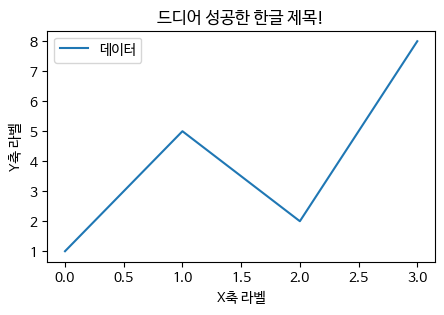

In [ ]:
# --- 이제 그래프를 그려도 경고가 뜨지 않습니다. ---

# 예시 그래프
# (여기에 원래 그리려던 그래프 코드를 넣으시면 됩니다)
plt.figure(figsize=(5, 3))
plt.title('드디어 성공한 한글 제목!')
plt.xlabel('X축 라벨')
plt.ylabel('Y축 라벨')
plt.plot([1, 5, 2, 8], label='데이터')
plt.legend()
plt.show()

# 2.데이터 불러오기

In [ ]:
# 데이터프레임으로 변환

def create_dataframe_from_text(data: str) -> pd.DataFrame:
    """
    텍스트 데이터를 파싱하여 pandas DataFrame으로 변환. 첫 열은 행 번호로 처리.
    Parameters:
        data (str): 텍스트 형식의 데이터 (탭과 줄바꿈으로 구분).
    Returns:
        pd.DataFrame: 데이터프레임으로 변환된 결과.
    """
    # 텍스트 데이터를 줄 단위로 분리
    lines = data.strip().split("\n")

    # 첫 줄은 헤더로 사용
    header = lines[0].strip().split("\t")

    # 나머지 줄은 데이터로 처리
    rows = [line.strip().split("\t") for line in lines[1:]]

    # 데이터프레임 생성
    df = pd.DataFrame(rows, columns=["doc_id"] + header)

    # 첫 열(Index)을 인덱스로 설정하고 제거
    #df.set_index("Index", inplace=True)

    # 숫자형 데이터로 변환
    df = df.apply(pd.to_numeric)

    return df


# 통합 데이터 불러오기
df = pd.read_excel(file_path + 'result/gb_data_2(doc,1g2g,wn_cls,20250414).xlsx') ###
df[:3]
# 1기, 2기: doc_id는 2748부터 끝까지
df['period'] = np.where(
    df['doc_id'] < 2748,  # 조건
    'p1',                          # 조건이 참일 때
    'p2'                           # 조건이 거짓일 때
)
df

,doc_id,doc_raw,doc_split_12gram,r_no,title,w_new,ho_no,grid_1,wn_cls,period
0,1,創刊辭 强者도 부르짖고 弱者도 부르짖으며 優者도 부르짖고 劣者도 부르짖도다 東西南北...,창간 辭 강자 약자 優者 劣者 동서 남북 사해 팔방 소리 소리 판단 좌우 間 다수 ...,1,創刊辭,uk01,1,01q,0,p1
1,2,哲人은 말하되 多數 人民의 聲은 곳 神의 聲이라 하엿나니 神은 스스로 要求가 없는지...,哲人 다수 인민 요구 인민 소리 요구 발표 갈앙 인민 소리 갈앙 다수 인민 갈앙 요...,1,創刊辭,uk01,1,01q,0,p1
2,3,世界를 알라 사람은 天使도 안이며 野獸도 안이오 오즉 사람일 뿐이로다 이만치 進化된...,세계 사람 야수 사람 진화 진화 지식 진화 도덕 동물 세계 천당 지옥 세계 진화 국...,2,世界를 알라,uk01,1,01q,0,p1
3,4,사람과 世界는 決코 논하볼 것이 안이엇다 사람으로 된 世界 世界로 된 사람 둘이 안...,사람 세계 사람 세계 세계 사람 세계 대표 시대 가치 사람 대표 문화 상징 符號 사...,2,世界를 알라,uk01,1,01q,0,p1
4,5,過去는 論할 것이 업도다만은 今日과 가티 交通이 이마마하고 知識이 이마마하고 一切의...,過去 금일 교통 지식 일체 문물 오늘 세계 理解 공자 천하 천하 理解 오늘 날 사람...,2,世界를 알라,uk01,1,01q,0,p1
...,...,...,...,...,...,...,...,...,...,...
6797,6798,미국에서는 每人에게 奴僕이 식 돌아감니다 단 機械奴僕만 이건 무슨 말이냐 하면 기계...,미국 노복 機械 노복 機械 力 운전 계산 人力 계산 미국 국민 사람 機械 輸入 숫자...,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,김철산,72,24q,2,p2
6798,6799,매년 저축은ㅡ필요의 비용을 다 쓴 뒤의 것 말이지요ㅡ매년에 억 딸라 金 루불로는 억...,저축 필요 비용 미국 교과 書 실상 미국 富豪 캐나다 영국 미국 부분 미국 캐나다 ...,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,김철산,72,24q,2,p2
6799,6800,그러고 또 캐나다는 아조 겸손스럽게 좀 유순하게 미국의 北邊繼續이라고ㅡ국제연맹의 축...,캐나다 미국 국제_연맹 국제_연맹 원인 경제 機械 캐나다 산업 북미 자본 점령 부분...,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,김철산,72,24q,2,p2
6800,6801,25년 전에는 영국이 美보다 배나 더 되게 輸入하엿섯음니다 캐나다 사람들은 지금 그...,영국 미국 輸入 캐나다 사람 영국 一部 미국 호주 캐나다 진화 호주 일본 침입 보호...,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,김철산,72,24q,2,p2


# 3.2기 So토픽 최대 문서 추출

In [ ]:
# 2기에 So 토픽(T1)이 최대를 차지한 논설 61개의 r_no

r_no_2p_t1_max = [140, 157, 160, 174, 180, 186, 189, 193, 195, 198, 201, 204, 205, 206,
       209, 214, 217, 218, 221, 224, 232, 234, 236, 238, 239, 246, 247, 248,
       249, 252, 254, 256, 258, 259, 260, 262, 265, 266, 269, 278, 282, 283,
       286, 287, 289, 291, 293, 295, 297, 299, 301, 303, 305, 310, 311, 313,
       316, 317, 325, 331, 334]

In [ ]:
t1_12groups_doc = df[df['r_no'].isin(r_no_2p_t1_max)]
t1_12groups_doc

,doc_id,doc_raw,doc_split_12gram,r_no,title,w_new,ho_no,grid_1,wn_cls,period
2857,2858,朝鮮人과 政治的 生活 民衆政治의 今日 總督政治 年 後 朝鮮人의 政治生活修養의 必要 ...,朝鮮_人 정치 생활 민중 정치 금일 정치 총독 朝鮮_人 수양 정치 생활 필요 정치 ...,140,"朝鮮人과 政治的 生活, -民衆政治의 今日-總督政治 10년 후-, -朝鮮人의 政治生活...",이돈화,29,10q,1,p2
2858,2859,그럼으로 政治는 治者와 被治者가 한가지로 共同責任과 義務를 가지고 被治者는 써 治者...,정치 治者 피치 者 공동 책임 의무 者 피치 治者 감독 治者 者 피치 指導 방침 확...,140,"朝鮮人과 政治的 生活, -民衆政治의 今日-總督政治 10년 후-, -朝鮮人의 政治生活...",이돈화,29,10q,1,p2
2859,2860,일본 어떤 政客이 地方에 遊說할 때에 그 地方 어떤 小學校 敎員이 質問을 發하기를 ...,일본 정객 지방 지방 학교 小 교원 질문 정치 정치 정치 정치 인민 관계 지방 인민...,140,"朝鮮人과 政治的 生活, -民衆政治의 今日-總督政治 10년 후-, -朝鮮人의 政治生活...",이돈화,29,10q,1,p2
2860,2861,例하야 近日로 말하면 所謂 物價調節이라하야 金錢이 收縮되는 그 影響은 비록 微賤한 ...,근일 조절 물가 금전 영향 車 軍 人力 영향 일개 농부 관계 정치 국민 개인 관계 ...,140,"朝鮮人과 政治的 生活, -民衆政治의 今日-總督政治 10년 후-, -朝鮮人의 政治生活...",이돈화,29,10q,1,p2
2861,2862,일본의 現在 普選運動을 絶叫하는 것도 要컨대 客員된 多數의 人民이 客員으로부터 超越...,일본 현재 절규 다수 인민 초월 自己 自己 각오 세계 금일 민중 정치 철저 현실 현...,140,"朝鮮人과 政治的 生活, -民衆政治의 今日-總督政治 10년 후-, -朝鮮人의 政治生活...",이돈화,29,10q,1,p2
...,...,...,...,...,...,...,...,...,...,...
6797,6798,미국에서는 每人에게 奴僕이 식 돌아감니다 단 機械奴僕만 이건 무슨 말이냐 하면 기계...,미국 노복 機械 노복 機械 力 운전 계산 人力 계산 미국 국민 사람 機械 輸入 숫자...,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,김철산,72,24q,2,p2
6798,6799,매년 저축은ㅡ필요의 비용을 다 쓴 뒤의 것 말이지요ㅡ매년에 억 딸라 金 루불로는 억...,저축 필요 비용 미국 교과 書 실상 미국 富豪 캐나다 영국 미국 부분 미국 캐나다 ...,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,김철산,72,24q,2,p2
6799,6800,그러고 또 캐나다는 아조 겸손스럽게 좀 유순하게 미국의 北邊繼續이라고ㅡ국제연맹의 축...,캐나다 미국 국제_연맹 국제_연맹 원인 경제 機械 캐나다 산업 북미 자본 점령 부분...,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,김철산,72,24q,2,p2
6800,6801,25년 전에는 영국이 美보다 배나 더 되게 輸入하엿섯음니다 캐나다 사람들은 지금 그...,영국 미국 輸入 캐나다 사람 영국 一部 미국 호주 캐나다 진화 호주 일본 침입 보호...,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,김철산,72,24q,2,p2


# 4.변별 단어 검정 준비

## 4.1.tfidf DTM 산출

In [ ]:
# 문서-단어 행렬
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_dtm_1gram(df, col_name, stopw, rank_n): # rank_n : 고빈도 단어 n 순위까지
    '''
    # 문서-단어 행렬(dtm) 산출 함수
    '''
    # 단어 종류 모두 벡터화. 1음절 이상
    tv = TfidfVectorizer(ngram_range=(1,1), stop_words=stopw) ## 두 글자 이상
    dtm = tv.fit_transform(df[col_name])

    # tfidf 합계를 사용해 고빈도 단어 추출 (희소 행렬로 작업)
    term_sums = np.array(dtm.sum(axis=0)).flatten()
    highword_indices = term_sums.argsort()[-rank_n:][::-1]  # 상위 rank_n 개 단어 인덱스
    highword_list = [tv.get_feature_names_out()[i] for i in highword_indices]

    # 고빈도 단어만 포함된 희소 행렬 생성
    feature_dtm = dtm[:, highword_indices]
    feature_df = pd.DataFrame(feature_dtm.toarray(), columns=highword_list, index=df.index)

    return feature_df

In [ ]:
# 함수 실행
# 제외할 단어
stopw = ['문제', '금일', '관계']
dtm_gb_df = get_dtm_1gram(t1_12groups_doc, 'doc_split_12gram', stopw, 50)
dtm_gb_df

,사람,사회,운동,계급,朝鮮,생활,자유,사상,정치,主義,...,노동,청년,자본_家,과학,노예,理想,인류,영국,오늘,자연
2857,0.000000,0.0,0.0,0.000000,0.000000,0.202718,0.0,0.0,0.449273,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2858,0.000000,0.0,0.0,0.034614,0.000000,0.000000,0.0,0.0,0.436405,0.000000,...,0.000000,0.0,0.0,0.0,0.053309,0.000000,0.0,0.000000,0.000000,0.0
2859,0.000000,0.0,0.0,0.000000,0.000000,0.103472,0.0,0.0,0.726176,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2860,0.000000,0.0,0.0,0.000000,0.000000,0.140312,0.0,0.0,0.466450,0.202414,...,0.059385,0.0,0.0,0.0,0.000000,0.061941,0.0,0.000000,0.000000,0.0
2861,0.000000,0.0,0.0,0.051772,0.100896,0.107098,0.0,0.0,0.534050,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.070917,0.0,0.000000,0.065978,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6797,0.068907,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
6798,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.151301,0.000000,0.0
6799,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.254763,0.000000,0.0
6800,0.084081,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.283103,0.000000,0.0


## 4.2.필자 구분 정보 결합

In [ ]:
t1_12groups_doc[['doc_id', 'w_new', 'wn_cls']]

,doc_id,w_new,wn_cls
2857,2858,이돈화,1
2858,2859,이돈화,1
2859,2860,이돈화,1
2860,2861,이돈화,1
2861,2862,이돈화,1
...,...,...,...
6797,6798,김철산,2
6798,6799,김철산,2
6799,6800,김철산,2
6800,6801,김철산,2


In [ ]:
combi_dtm = pd.concat([dtm_gb_df, t1_12groups_doc[['doc_id', 'w_new', 'wn_cls']]], axis=1).set_index('doc_id')
combi_dtm

,사람,사회,운동,계급,朝鮮,생활,자유,사상,정치,主義,...,자본_家,과학,노예,理想,인류,영국,오늘,자연,w_new,wn_cls
doc_id,,,,,,,,,,,,,,,,,,,,,
2858,0.000000,0.0,0.0,0.000000,0.000000,0.202718,0.0,0.0,0.449273,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,이돈화,1
2859,0.000000,0.0,0.0,0.034614,0.000000,0.000000,0.0,0.0,0.436405,0.000000,...,0.0,0.0,0.053309,0.000000,0.0,0.000000,0.000000,0.0,이돈화,1
2860,0.000000,0.0,0.0,0.000000,0.000000,0.103472,0.0,0.0,0.726176,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,이돈화,1
2861,0.000000,0.0,0.0,0.000000,0.000000,0.140312,0.0,0.0,0.466450,0.202414,...,0.0,0.0,0.000000,0.061941,0.0,0.000000,0.000000,0.0,이돈화,1
2862,0.000000,0.0,0.0,0.051772,0.100896,0.107098,0.0,0.0,0.534050,0.000000,...,0.0,0.0,0.000000,0.070917,0.0,0.000000,0.065978,0.0,이돈화,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6798,0.068907,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,김철산,2
6799,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.151301,0.000000,0.0,김철산,2
6800,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.254763,0.000000,0.0,김철산,2


# 5.검정하기

## 5.1.카이제곱 검정

In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2

# --- 1. 데이터 로딩 ---
# 사용자님의 DTM 파일을 'dtm_data.csv'라고 가정하고 불러옵니다.
# 만약 파일이 없다면, 재현을 위해 아래 샘플 데이터 생성 코드를 활성화하세요.

df = combi_dtm

# --- 2. 피처(X)와 메타데이터 분리 ---
# 분석에 사용할 메타데이터 컬럼 목록
meta_cols = ['w_new', 'wn_cls']

# 메타데이터가 아닌 모든 컬럼을 피처(단어)로 간주
feature_cols = [col for col in df.columns if col not in meta_cols]

# 피처 데이터만 선택
X_numeric = df[feature_cols]

print("--- 2. DTM 피처(X) 분리 완료 ---")
print(X_numeric.head())
print("\n")


# --- 3. DTM을 이진(Binary) 데이터로 변환 ---
# 0보다 큰 모든 값을 1로 변환 (단어 존재 여부)
X_binary = (X_numeric > 0).astype(int)

print("--- 3. 이진 DTM으로 변환 완료 ---")
print("이 데이터가 카이제곱 검정의 최종 입력(X)이 됩니다.")
print(X_binary.head())
print("\n")


# --- 4. 목표 1: 그룹 간(개벽주도층 vs 사회주의자) 변별 단어 찾기 ---
print("--- 4. [분석 1] 그룹(wn_cls) 간 변별 단어 분석 ---")

# 타겟(y)으로 'wn_cls' 컬럼을 사용 (1, 2 -> 0, 1로 변환)
y_group = df['wn_cls'] - 1

# 카이제곱 검정 실행
chi2_scores_group, p_values_group = chi2(X_binary, y_group)

# 결과 정리
results_group = pd.DataFrame({
    '단어': feature_cols,
    '그룹 변별 통계량': chi2_scores_group,
    'p_value': p_values_group
}).sort_values(by='그룹 변별 통계량', ascending=False)

print("결과: '개벽주도층(1)'과 '사회주의자(2)'를 구분하는 주요 단어")
print(results_group.head(10))
print("\n")

--- 2. DTM 피처(X) 분리 완료 ---
         사람   사회   운동        계급        朝鮮        생활   자유   사상        정치  \
doc_id                                                                    
2858    0.0  0.0  0.0  0.000000  0.000000  0.202718  0.0  0.0  0.449273   
2859    0.0  0.0  0.0  0.034614  0.000000  0.000000  0.0  0.0  0.436405   
2860    0.0  0.0  0.0  0.000000  0.000000  0.103472  0.0  0.0  0.726176   
2861    0.0  0.0  0.0  0.000000  0.000000  0.140312  0.0  0.0  0.466450   
2862    0.0  0.0  0.0  0.051772  0.100896  0.107098  0.0  0.0  0.534050   

              主義  ...        노동   청년  자본_家   과학        노예        理想   인류   영국  \
doc_id            ...                                                           
2858    0.000000  ...  0.000000  0.0   0.0  0.0  0.000000  0.000000  0.0  0.0   
2859    0.000000  ...  0.000000  0.0   0.0  0.0  0.053309  0.000000  0.0  0.0   
2860    0.000000  ...  0.000000  0.0   0.0  0.0  0.000000  0.000000  0.0  0.0   
2861    0.202414  ...  0.059385  0.0   0.0

In [ ]:
results_group_1 = results_group.head(10).reset_index(drop=True)[['단어']]
results_group_1

,단어
0,인간
1,사람
2,자본_主義
3,부르주아
4,발달
5,자본_家
6,中産_계급
7,계급
8,사상
9,생산


In [ ]:
results_group_1['단어'].tolist()

['인간', '사람', '자본_主義', '부르주아', '발달', '자본_家', '中産_계급', '계급', '사상', '생산']

## 5.2.LLR(로그우도비) 검정

In [ ]:
from scipy.stats import chi2_contingency

# --- 5. 목표 1에 대한 LLR(G-test) 검정 (수정 완료) ---
print("--- 5. [분석 1] 그룹(wn_cls) 간 변별 단어 분석 (LLR G-test) ---")

# [핵심 수정] 인덱스 불일치 문제를 해결하기 위해 두 데이터프레임의 인덱스를 초기화합니다.
# df는 y_group의 소스가 되는 데이터프레임입니다. (예: combi_dtm)
df = df.reset_index(drop=True)
X_binary = X_binary.reset_index(drop=True)

# 이제 인덱스가 통일되었으므로 y_group을 다시 정의합니다.
y_group = df['wn_cls'] - 1

llr_results = []

# 각 단어(피처)에 대해 LLR 검정을 수행합니다.
for feature in X_binary.columns:
    # 1. 분할표(contingency table) 생성
    # 이제 인덱스가 일치하므로 정상적으로 생성됩니다.
    contingency_table = pd.crosstab(y_group, X_binary[feature])

    # 만약 특정 단어가 한 그룹에만 존재하여 분할표가 2x2가 아닌 경우, 검정에서 제외할 수 있습니다.
    if contingency_table.shape != (2, 2):
        continue

    # 2. LLR 검정 수행
    g, p, dof, expected = chi2_contingency(contingency_table, lambda_="log-likelihood")

    # 3. 결과 저장
    llr_results.append({
        '단어': feature,
        'LLR 통계량(G)': g,
        'p_value': p
    })

# 결과 정리
results_llr = pd.DataFrame(llr_results).sort_values(by='LLR 통계량(G)', ascending=False)

print("결과: '개벽주도층(1)'과 '사회주의자(2)'를 구분하는 주요 단어 (LLR 검정)")
print(results_llr.head(10))
print("\n")

--- 5. [분석 1] 그룹(wn_cls) 간 변별 단어 분석 (LLR G-test) ---
결과: '개벽주도층(1)'과 '사회주의자(2)'를 구분하는 주요 단어 (LLR 검정)
       단어  LLR 통계량(G)       p_value
0      사람   52.204511  5.001111e-13
12  자본_主義   44.298946  2.818679e-11
10     인간   44.107370  3.108483e-11
24   부르주아   43.952894  3.363746e-11
23     발달   29.028261  7.133005e-08
42   자본_家   28.690821  8.490520e-08
38  中産_계급   23.037140  1.589019e-06
3      계급   21.201753  4.133862e-06
1      사회   17.930878  2.290743e-05
7      사상   17.454102  2.943285e-05




# 6.단어 양상 및 문맥 비교

In [ ]:
db_4_check = t1_12groups_doc[['doc_split_12gram', 'w_new', 'wn_cls']]
db_4_check_1 = db_4_check.reset_index(drop=True)
db_4_check_1

,doc_split_12gram,w_new,wn_cls
0,朝鮮_人 정치 생활 민중 정치 금일 정치 총독 朝鮮_人 수양 정치 생활 필요 정치 ...,이돈화,1
1,정치 治者 피치 者 공동 책임 의무 者 피치 治者 감독 治者 者 피치 指導 방침 확...,이돈화,1
2,일본 정객 지방 지방 학교 小 교원 질문 정치 정치 정치 정치 인민 관계 지방 인민...,이돈화,1
3,근일 조절 물가 금전 영향 車 軍 人力 영향 일개 농부 관계 정치 국민 개인 관계 ...,이돈화,1
4,일본 현재 절규 다수 인민 초월 自己 自己 각오 세계 금일 민중 정치 철저 현실 현...,이돈화,1
...,...,...,...
1370,미국 노복 機械 노복 機械 力 운전 계산 人力 계산 미국 국민 사람 機械 輸入 숫자...,김철산,2
1371,저축 필요 비용 미국 교과 書 실상 미국 富豪 캐나다 영국 미국 부분 미국 캐나다 ...,김철산,2
1372,캐나다 미국 국제_연맹 국제_연맹 원인 경제 機械 캐나다 산업 북미 자본 점령 부분...,김철산,2
1373,영국 미국 輸入 캐나다 사람 영국 一部 미국 호주 캐나다 진화 호주 일본 침입 보호...,김철산,2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# --- 사전 준비 ---
# 이전 코드에서 생성된 df, X_binary, results_group 변수가 필요합니다.
# 이 코드는 재현을 위해 이전 단계의 데이터와 결과를 간략하게 다시 생성합니다.

# 이진 DTM 생성
feature_cols = results_group_1['단어'].tolist()[:-1] ### 두 검정 중 중복단어 9개만 사용
X_binary = pd.DataFrame(0, index=db_4_check_1.index, columns=feature_cols)
for i, text in enumerate(db_4_check_1['doc_split_12gram']):  ###
    for word in feature_cols:
        if word in text:
            X_binary.loc[i, word] = 1

In [ ]:
X_binary

,인간,사람,자본_主義,부르주아,발달,자본_家,中産_계급,계급,사상
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1370,0,1,0,0,0,0,0,0,0
1371,0,0,0,0,0,0,0,0,0
1372,0,0,0,0,0,0,0,0,0
1373,0,1,0,0,0,0,0,0,0


In [ ]:
# ====================================================================
# 2. 함수 정의
# ====================================================================

def analyze_crosstab(df, X_binary, word_to_analyze, group_map):
    """
    특정 단어에 대한 교차 빈도 분석표를 생성하고 출력합니다.

    :param df: 그룹 정보('wn_cls')가 포함된 데이터프레임
    :param X_binary: 이진 DTM 데이터프레임
    :param word_to_analyze: 분석할 단어 (문자열)
    :param group_map: 그룹 ID를 실제 이름으로 매핑하는 딕셔너리 (e.g., {1: '그룹1', 2: '그룹2'})
    """
    print("--- 방법 1: 교차 빈도 분석 ---")

    # 인덱스가 다를 경우를 대비해 초기화
    df = df.reset_index(drop=True)
    X_binary = X_binary.reset_index(drop=True)

    crosstab_result = pd.crosstab(df['wn_cls'], X_binary[word_to_analyze])

    # 인덱스와 컬럼 이름 변경
    crosstab_result = crosstab_result.rename(index=group_map)
    crosstab_result = crosstab_result.rename(columns={0: f"'{word_to_analyze}' 없음", 1: f"'{word_to_analyze}' 있음"})

    print(f"\n'{word_to_analyze}' 단어의 그룹별 사용 빈도표:")
    print(crosstab_result)
    print(f"\n해석: 교차표를 통해 '{word_to_analyze}' 단어의 그룹별 분포를 확인할 수 있습니다.\n")

In [ ]:
group_map = {1: '개벽주도층', 2: '사회주의자'}

for p in X_binary.columns:
    word_to_analyze = p
    analyze_crosstab(db_4_check_1, X_binary, word_to_analyze, group_map)

--- 방법 1: 교차 빈도 분석 ---

'인간' 단어의 그룹별 사용 빈도표:
인간      '인간' 없음  '인간' 있음
wn_cls                  
개벽주도층       336       75
사회주의자       906       58

해석: 교차표를 통해 '인간' 단어의 그룹별 분포를 확인할 수 있습니다.

--- 방법 1: 교차 빈도 분석 ---

'사람' 단어의 그룹별 사용 빈도표:
사람      '사람' 없음  '사람' 있음
wn_cls                  
개벽주도층       242      169
사회주의자       769      195

해석: 교차표를 통해 '사람' 단어의 그룹별 분포를 확인할 수 있습니다.

--- 방법 1: 교차 빈도 분석 ---

'자본_主義' 단어의 그룹별 사용 빈도표:
자본_主義   '자본_主義' 없음  '자본_主義' 있음
wn_cls                        
개벽주도층          403           8
사회주의자          847         117

해석: 교차표를 통해 '자본_主義' 단어의 그룹별 분포를 확인할 수 있습니다.

--- 방법 1: 교차 빈도 분석 ---

'부르주아' 단어의 그룹별 사용 빈도표:
부르주아    '부르주아' 없음  '부르주아' 있음
wn_cls                      
개벽주도층         406          5
사회주의자         840        124

해석: 교차표를 통해 '부르주아' 단어의 그룹별 분포를 확인할 수 있습니다.

--- 방법 1: 교차 빈도 분석 ---

'발달' 단어의 그룹별 사용 빈도표:
발달      '발달' 없음  '발달' 있음
wn_cls                  
개벽주도층       400       11
사회주의자       859      105

해석: 교차표를 통해 '발달' 단어의 그룹별 분포를 확인할 수 있습니다.

--- 방법 1: 

In [ ]:
def visualize_proportions(df, X_binary, words_to_check, group_map):
    """
    주어진 단어 목록에 대해 그룹별 사용 비율을 계산하고 막대그래프로 시각화합니다.

    :param df: 그룹 정보('wn_cls')가 포함된 데이터프레임
    :param X_binary: 이진 DTM 데이터프레임
    :param words_to_check: 분석할 단어 목록 (리스트)
    :param group_map: 그룹 ID를 실제 이름으로 매핑하는 딕셔너리
    """
    print("--- 방법 2: 그룹별 사용 비율 시각화 ---")

    # 인덱스가 다를 경우를 대비해 초기화
    df = df.reset_index(drop=True)
    X_binary = X_binary.reset_index(drop=True)

    # 원본 데이터에 이진 DTM을 합쳐서 계산 준비
    analysis_df = pd.concat([df[['wn_cls']], X_binary[words_to_check]], axis=1)

    # 그룹별로 각 단어가 포함된 '문서의 비율' 계산
    group_counts = analysis_df['wn_cls'].value_counts()
    proportions = analysis_df.groupby('wn_cls').sum().div(group_counts, axis=0)
    proportions = proportions.rename(index=group_map)

    # [수정된 부분] 인덱스 이름을 'index'로 명시적으로 지정
    proportions.index.name = 'index'

    # 보기 쉽게 데이터 형태 변환 (Melt)
    proportions_melted = proportions.reset_index().melt(id_vars='index', var_name='단어', value_name='문서 포함 비율')

    # 막대그래프 시각화
    plt.rcParams['font.family'] = 'NanumBarunGothic' # 한글 폰트 설정
    plt.figure(figsize=(12, 6))
    sns.barplot(data=proportions_melted, x='단어', y='문서 포함 비율', hue='index')
    plt.title('상위 단어의 그룹별 문서 포함 비율 비교', fontsize=16)
    plt.ylabel('해당 단어가 포함된 문서의 비율')
    plt.show()

    print("해석: 그래프를 통해 어떤 단어가 어느 그룹에서 더 지배적으로 사용되는지 한눈에 파악할 수 있습니다.\n")

--- 방법 2: 그룹별 사용 비율 시각화 ---


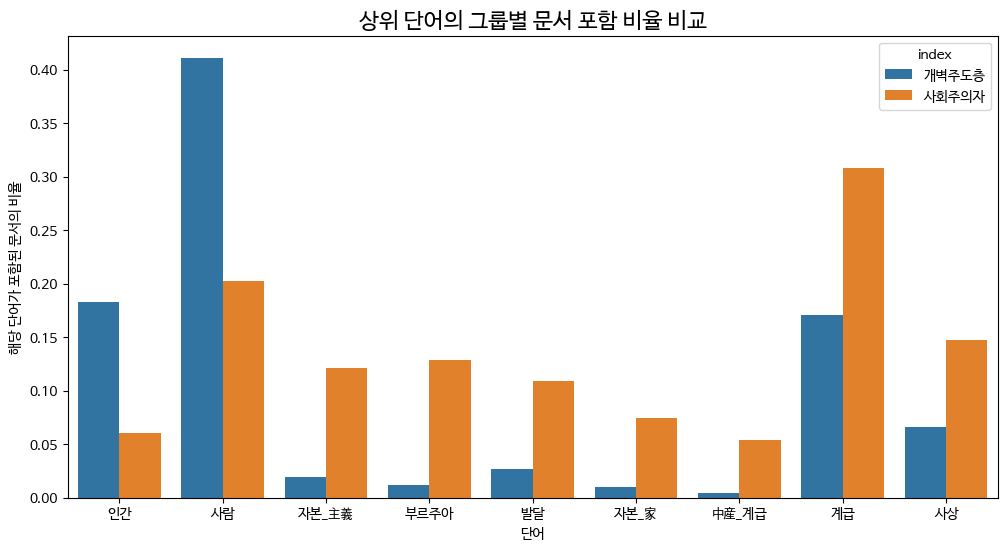

해석: 그래프를 통해 어떤 단어가 어느 그룹에서 더 지배적으로 사용되는지 한눈에 파악할 수 있습니다.



In [ ]:
group_map = {1: '개벽주도층', 2: '사회주의자'}
words_to_check = X_binary.columns.tolist()

visualize_proportions(db_4_check_1, X_binary, words_to_check, group_map)

In [ ]:
# --------------------------------------------------------------------
# 방법 3: KWIC (Key Word In Context) 분석 (수정된 버전)
# --------------------------------------------------------------------
print("--- 방법 3: KWIC 분석으로 실제 사용 맥락 확인 ---")

def show_kwic(df, keyword, text_column='doc_split_12gram', group_column='wn_cls', window=30):
    """
    데이터프레임에서 키워드의 사용 맥락(KWIC)을 찾아 그룹별로 정렬하여 출력합니다.

    :param df: 분석할 데이터프레임 (e.g., db_4_check)
    :param keyword: 찾을 키워드
    :param text_column: 텍스트 내용이 담긴 컬럼 이름
    :param group_column: 그룹 정보가 담긴 컬럼 이름
    :param window: 키워드 앞뒤로 보여줄 글자 수
    """
    print(f"\n---'{keyword}' 단어의 사용 맥락(KWIC)---")

    # 1. 발견된 컨텍스트를 임시로 저장할 리스트
    found_contexts = []

    # 2. 전체 데이터프레임을 순회하며 컨텍스트 '수집'
    for index, row in df.iterrows():
        # 텍스트 컬럼의 값이 문자열인지 확인
        if not isinstance(row[text_column], str):
            continue

        text = row[text_column]

        # 텍스트에 키워드가 포함되어 있으면 리스트에 추가
        if keyword in text:
            group_id = row[group_column]
            pos = text.find(keyword)
            start = max(0, pos - window)
            end = min(len(text), pos + len(keyword) + window)
            context = text[start:end]
            highlighted_context = context.replace(keyword, f"▶{keyword}◀")

            # 딕셔너리 형태로 그룹 정보와 컨텍스트를 함께 저장
            found_contexts.append({'group': group_id, 'context': highlighted_context})

    # 3. 수집된 결과를 그룹(group) 번호를 기준으로 '정렬'
    sorted_contexts = sorted(found_contexts, key=lambda x: x['group'])

    # 4. 정렬된 순서대로 '출력'
    if not sorted_contexts:
        print(f"'{keyword}' 단어가 포함된 문서를 찾을 수 없습니다.")
        return

    for item in sorted_contexts:
        print(f"[그룹 {item['group']}] ...{item['context']}...")


# '인간'과 '자본_主義' 단어의 실제 사용 맥락 비교
# df 대신 사용자님의 실제 데이터프레임 변수명(예: db_4_check)을 사용하세요.
show_kwic(db_4_check_1, '인간')
show_kwic(db_4_check_1, '자본_主義')

print("\n해석: KWIC를 통해 같은 단어라도 그룹별로 어떤 뉘앙스와 의미로 사용되는지 질적으로 분석할 수 있습니다.")

--- 방법 3: KWIC 분석으로 실제 사용 맥락 확인 ---

---'인간' 단어의 사용 맥락(KWIC)---
[그룹 1] ...▶인간◀ 어린_이 사람 過去 인연 사람 過去 지식 사람 사회 ...
[그룹 1] ... 하루 재래 어린_이 종래 동양 사람 一大 유령 고물 ▶인간◀ 분석 시작 군자 빈자 富者 칭호 분석 결과 조각 조각...
[그룹 1] ...人 특수 級 이익 옹호 악의 別 문제 재래 사회_제도 ▶인간◀ 분석 어린_이 不祥 人事 사회_제도 하루 維持 하루 ...
[그룹 1] ...민족 정치 해방 ▶인간◀ 계급 해방 남녀 어린_이 해방 해방 운동 철저 군자 ...
[그룹 1] ... 소작_人 삼남 지방 湖南 지방 소작 쟁의 지주_소작 ▶인간◀ 쟁투 관청 간섭 범위 증대...
[그룹 1] ...국 묵자 流 유교 者 천박 윤리 사상 구별 중시 근본 ▶인간◀ 감격 겸애 직접 노동 主義 提倡 실천 묵자 特点 사상...
[그룹 1] ... 조직 운동 현대 조직 경제 행복 不_완전 상태 緣故 ▶인간◀_사회 완전 조직 실행 표준 點 자유_평등 자유 조직 ...
[그룹 1] ... 사람 자유 制裁 사람_性 본래 相互 扶助 본질 사회 ▶인간◀ 본질 완전 扶助 협동 자유 생활 설명 국가 권력 법률...
[그룹 1] ...사람 죄악 사회_제도 완전 개조 동기 소멸 자연 사회 ▶인간◀ 制裁 권력 만인 扶助 相互 원칙 眞 자유 생활 주장 ...
[그룹 1] ... 고정 무궁 무궁 우주 全 조직 순서 전개 질서 연장 ▶인간◀ 界 事理 사물 태고 只今 일정 계단 역사 사상 완전 ...
[그룹 1] ...▶인간◀ 지식 허위 망상 사욕 자연 理法 無爲 大道 相互 도탄...
[그룹 1] ...세계 사회_主義 운동 기술 豺狼 세력 ▶인간◀ 세력 상해 동무 편지 편지 동포 기념 상황 야기 式 ...
[그룹 1] ...세력 반항 전환 절대 세력 존재 동무 궁극 豺狼 세력 ▶인간◀ 세력 절대 세력 세계 사회_主義 운동 각국 間 민족 ...
[그룹 1] ...배 하나_님 否認 緣故 한울 하

In [ ]:
show_kwic(db_4_check_1, '자본_主義')


---'자본_主義' 단어의 사용 맥락(KWIC)---
[그룹 1] ...主義_者 회합 결의 성공 러시아 공산 혁명 주저 태도 ▶자본_主義◀ 연맹 국제 효과 신앙 공격 러시아 主義_者 중심 인터...
[그룹 1] ...대_사회 현대_사회 사회_조직 大 도박 해석 현대_人 ▶자본_主義◀ 경제 경쟁 순수 소유 慾 시간 죄악...
[그룹 1] ...운동 주장 사람 우연 一朝 행운 지위 환경 유래 主義 ▶자본_主義◀ 행위 사람 계급_意識 化 機械 意識 계급_意識 증거 ...
[그룹 1] ...민족 국권 운동 노농 러시아 아시아 영국 미국 프랑스 ▶자본_主義◀ 열국 결합 파리 會議 평화 처음 正義 人道 자결 민족...
[그룹 1] ... 노농 러시아 러시아 공산 혁명 수행 세계 혁명 실행 ▶자본_主義◀ 열강 국내 무산 민중 세력 약소_민족 방책 진행 독일...
[그룹 1] ...세계 혁명_운동 세력 발발 발발 형세 열국 대책 강구 ▶자본_主義◀ 국가 나라 가담 동무 필요 금년...
[그룹 1] ...滋味 帝國 ▶자본_主義◀ 일본 帝國 자본 발전 자체 충돌 열강 구미 러시아 위...
[그룹 1] ...중 자체 權 維持 자본 특권 인간 평등 오늘 날 세상 ▶자본_主義◀ 예언 노골 본위 자본 본위 인간 전환 조짐 인간 인간...
[그룹 2] ... 진리 把持 者 레닌 眞正 간디 시작 印度 간디 운동 ▶자본_主義◀ 열국 세계 민주_主義 전쟁 학대 정복 者 지배 해방 ...
[그룹 2] ...폴란드 독립 國 폴란드 무산_계급 러시아 프랑스 ▶자본_主義◀ 지배 독일 군국_主義 프랑스 자비 프랑스 사랑 프랑스...
[그룹 2] ... 세계 예언 독립 운동 발발 예언 국민 主義_者 중요 ▶자본_主義◀ 고도 발달 全 세계 ▶자본_主義◀ 착취 착취 被 관계 오...
[그룹 2] ... 아일랜드 운동 독립 명백 무산_계급 계급_운동 색채 ▶자본_主義◀ 고도 발달 오늘 날 세계 국민 主義 출발 국민 主義 ...
[그룹 2] ..._者 비참 운명 영국 商工業 통치 압박 印度 인구 全 ▶자본_

# The End of Note